In [212]:
import pandas as pd

In [213]:
pd.set_option('display.max_columns', None)
store_records = pd.read_csv('../data/sample_superstore_updated.csv')
store_records['order_year'] = store_records['order_date'].str[-4:]
store_records.head()

row_id        order_id  order_date   ship_date       ship_mode customer_id  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     customer_name    segment        country             city       state  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   postal_code region       product_id         category sub_category  \
0        42420  South  FUR-BO-10001798        Furniture    Bookcases   
1        42420  South  FUR-CH-10000454        Furniture       Chairs   
2        90036   West  OFF-LA-10000240  Office Supplies       Labels   
3        33311  South  FUR-TA-10000577        Furniture       Tables   
4        33311  South  OFF-ST-10000760  Office Supplies      Storage   

                                        product_name     sales  quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   discount    profit  year order_year  
0      0.00   41.9136  2016       2016  
1      0.00  219.5820  2016       2016  
2      0.00    6.8714  2016       2016  
3      0.45 -383.0310  2015       2015  
4      0.20    2.5164  2015       2015

In [214]:
store_records['order_date'] = pd.to_datetime(store_records['order_date'])
store_records['ship_date'] = pd.to_datetime(store_records['ship_date'])

## KPI Data Points for Dashboard

In [215]:
# sales, are they up? # sales are up 51% in the last 4 years
sales_delta = store_records[['order_id','sales','year']].groupby('year').agg({'sales':'sum','order_id':'first'}).reset_index()
sales_2017 = int(sales_delta['sales'].iloc[3])
sales_2016 = int(sales_delta['sales'].iloc[2])
sales_2014 = int(sales_delta['sales'].iloc[0])

sales_pct_change = (sales_2017 - sales_2014)/sales_2014 * 100
sales_pct_change

51.41343157520852

In [216]:
# sales are up 20% in last year, from 2016 to 2017
sales_pct_change_recent = (sales_2017 - sales_2016)/sales_2016 * 100
sales_pct_change_recent

20.35603778695185

In [217]:
# profits, are they up? # profits are up 88% in the last 4 years
profit_delta = store_records[['order_id','profit','year']].groupby('year').agg({'profit':'sum','order_id':'first'}).reset_index()
profits_2017 = int(profit_delta['profit'].iloc[3])
profits_2016 = int(profit_delta['profit'].iloc[2])
profits_2014 = int(profit_delta['profit'].iloc[0])

profit_pct_change = (profits_2017 - profits_2014)/profits_2014 * 100
profit_pct_change

88.60182064065559

In [218]:
# profits are up 14% in last year, from 2016 to 2017
profit_pct_change_recent = (profits_2017 - profits_2016)/profits_2016 * 100
profit_pct_change_recent

14.235588972431076

In [219]:
# year/year sales trend

sales_delta

year        sales        order_id
0  2014  484247.4981  CA-2014-115812
1  2015  470532.5090  US-2015-108966
2  2016  609205.5980  CA-2016-152156
3  2017  733215.2552  CA-2017-114412

In [220]:
# total sales
total_sales = int(store_records['sales'].sum())
total_items_sold = int(store_records['quantity'].sum())
print(f"Total sales: ${total_sales}.")
print(f"Total quantity: {total_items_sold}.")

Total sales: $2297200.
Total quantity: 37873.


In [221]:
# category of most sold products (rank top 3)
# there are only 3 main categories, but this is where each ranks

top_3_category = store_records[['product_id', 'quantity', 'product_name','category','sub_category']].groupby('category').agg({'product_id':'count','quantity':'sum'}).rename(columns={'product_id':'product_id_count'}).sort_values(by='quantity', ascending=False).reset_index()
top_3_category

category  product_id_count  quantity
0  Office Supplies              6026     22906
1        Furniture              2121      8028
2       Technology              1847      6939

In [222]:
# category of most sold products (rank top 5)

top_5_sub_category = store_records[['product_id', 'quantity', 'product_name','category','sub_category']].groupby('sub_category').agg({'product_id':'count', 'quantity':'sum'}).rename(columns={'product_id':'product_id_count'}).sort_values(by='quantity', ascending=False).reset_index()
top_5_sub_category = top_5_sub_category.iloc[0:5]
top_5_sub_category

sub_category  product_id_count  quantity
0      Binders              1523      5974
1        Paper              1370      5178
2  Furnishings               957      3563
3       Phones               889      3289
4      Storage               846      3158

In [223]:
# category that generated most profits (rank top 5)

top_5_sub_category = store_records[['product_id', 'profit', 'product_name','category','sub_category']].groupby('sub_category').agg({'product_id':'count', 'profit':'sum'}).rename(columns={'product_id':'product_id_count'}).sort_values(by='profit', ascending=False).reset_index()
top_5_sub_category = top_5_sub_category.iloc[0:5]
top_5_sub_category

sub_category  product_id_count      profit
0      Copiers                68  55617.8249
1       Phones               889  44515.7306
2  Accessories               775  41936.6357
3        Paper              1370  34053.5693
4      Binders              1523  30221.7633

In [224]:
# top 5 list of products that generate the most profit

high_profit_products = store_records[['product_id', 'product_name','category','sub_category','profit']].groupby('product_id').agg({'profit':'sum', 'product_name':'first', 'category':'first', 'sub_category':'first'}).sort_values(by='profit', ascending=False).reset_index()
high_profit_products_top_5 = high_profit_products.iloc[0:5]
high_profit_products_top_5

product_id      profit  \
0  TEC-CO-10004722  25199.9280   
1  OFF-BI-10003527   7753.0390   
2  TEC-CO-10001449   6983.8836   
3  TEC-CO-10003763   4570.9347   
4  TEC-AC-10002049   4425.3432   

                                        product_name         category  \
0              Canon imageCLASS 2200 Advanced Copier       Technology   
1  Fellowes PB500 Electric Punch Plastic Comb Bin...  Office Supplies   
2               Hewlett Packard LaserJet 3310 Copier       Technology   
3                 Canon PC1060 Personal Laser Copier       Technology   
4          Logitech G19 Programmable Gaming Keyboard       Technology   

  sub_category  
0      Copiers  
1      Binders  
2      Copiers  
3      Copiers  
4  Accessories

In [225]:
# top 5 list of products that generate the least profit

neg_profit_products = store_records[['product_id', 'product_name','category','sub_category','profit']].groupby('product_id').agg({'profit':'sum', 'product_name':'first', 'category':'first', 'sub_category':'first'}).sort_values(by='profit', ascending=True).reset_index()
neg_profit_products_top_5 = neg_profit_products.iloc[0:5]
neg_profit_products_top_5

product_id     profit  \
0  TEC-MA-10000418 -8879.9704   
1  TEC-MA-10000822 -4589.9730   
2  TEC-MA-10004125 -3839.9904   
3  FUR-TA-10000198 -2876.1156   
4  FUR-TA-10001889 -1934.3976   

                                        product_name    category sub_category  
0          Cubify CubeX 3D Printer Double Head Print  Technology     Machines  
1          Lexmark MX611dhe Monochrome Laser Printer  Technology     Machines  
2          Cubify CubeX 3D Printer Triple Head Print  Technology     Machines  
3  Chromcraft Bull-Nose Wood Oval Conference Tabl...   Furniture       Tables  
4  Bush Advantage Collection Racetrack Conference...   Furniture       Tables

In [226]:
# states that place the most orders

high_business_states = store_records[['product_id','quantity','state','region']].groupby('state').agg({'product_id':'count'}).sort_values(by='product_id', ascending=False).reset_index()
high_business_states = high_business_states.iloc[0:5]
high_business_states

state  product_id
0    California        2001
1      New York        1128
2         Texas         985
3  Pennsylvania         587
4    Washington         506

In [227]:
# regions that place the most orders

high_business_states = store_records[['product_id','state','region']].groupby('region').agg({'product_id':'count'}).sort_values(by='product_id', ascending=False).reset_index()
high_business_states = high_business_states.iloc[0:4]
high_business_states

region  product_id
0     West        3203
1     East        2848
2  Central        2323
3    South        1620

In [228]:
# popular orders by region

popular_by_region = store_records[['product_id','quantity','category','sub_category','region']].groupby(['region','category']).agg({'product_id':'count', 'quantity':'sum'}).sort_values(by='product_id', ascending=False).reset_index()
popular_by_region = popular_by_region.rename(columns={'product_id':'product_id_count'})
popular_by_region = popular_by_region.iloc[0:5]
popular_by_region

region         category  product_id_count  quantity
0     West  Office Supplies              1897      7235
1     East  Office Supplies              1712      6462
2  Central  Office Supplies              1422      5409
3    South  Office Supplies               995      3800
4     West        Furniture               707      2696

In [229]:
# states that purchase the most products 

high_business_states_q = store_records[['product_id','quantity','state','region']].groupby('state').agg({'quantity':'sum'}).sort_values(by='quantity', ascending=False).reset_index()
high_business_states_q = high_business_states_q.iloc[0:5]
high_business_states_q

state  quantity
0    California      7667
1      New York      4224
2         Texas      3724
3  Pennsylvania      2153
4    Washington      1883

In [230]:
# regions that purchase the most products 

high_business_states = store_records[['product_id','quantity','state','region']].groupby('region').agg({'product_id':'count', 'quantity':'sum'}).sort_values(by='product_id', ascending=False).reset_index()
high_business_states = high_business_states.rename(columns={'product_id':'product_id_count'})
high_business_states = high_business_states.iloc[0:4]
high_business_states

region  product_id_count  quantity
0     West              3203     12266
1     East              2848     10618
2  Central              2323      8780
3    South              1620      6209

In [231]:
# top 8 overall popular products

popular_products = store_records[['product_id','quantity','state','product_name']].groupby(['product_id']).agg({'quantity':'sum', 'product_name':'first'}).sort_values(by='quantity', ascending=False).reset_index()
popular_products = popular_products.iloc[0:8]
popular_products

product_id  quantity  \
0  TEC-AC-10003832        75   
1  OFF-PA-10001970        70   
2  OFF-BI-10001524        67   
3  FUR-CH-10002647        64   
4  OFF-BI-10002026        64   
5  FUR-TA-10001095        61   
6  TEC-AC-10002049        60   
7  OFF-BI-10004728        59   

                                        product_name  
0                 Logitech P710e Mobile Speakerphone  
1                                         Xerox 1881  
2  GBC Premium Transparent Covers with Diagonal L...  
3         Situations Contoured Folding Chairs, 4/Set  
4                            Avery Arch Ring Binders  
5                 Chromcraft Round Conference Tables  
6          Logitech G19 Programmable Gaming Keyboard  
7  Wilson Jones Turn Tabs Binder Tool for Ring Bi...

In [232]:
# popular products by region

popular_products_region = store_records[['product_id','quantity','state','region','product_name']].groupby(['product_id','region']).agg({'quantity':'sum', 'product_name':'first'}).sort_values(by='quantity', ascending=False).reset_index()
popular_products_region

product_id   region  quantity  \
0     TEC-AC-10003832     West        45   
1     OFF-BI-10000301  Central        34   
2     OFF-BI-10000756  Central        33   
3     OFF-PA-10001970     East        33   
4     OFF-BI-10003656     East        32   
...               ...      ...       ...   
5293  OFF-PA-10000048     West         1   
5294  OFF-BI-10000309     West         1   
5295  OFF-BI-10000315  Central         1   
5296  OFF-BI-10004738     West         1   
5297  OFF-PA-10004609     East         1   

                                           product_name  
0                    Logitech P710e Mobile Speakerphone  
1                                GBC Instant Report Kit  
2      Storex DuraTech Recycled Plastic Frosted Binders  
3                                            Xerox 1881  
4           Fellowes PB200 Plastic Comb Binding Machine  
...                                                 ...  
5293                                           Xerox 20  
5294  GBC Twin Loop Wire Binding Elements, 9/16" Spi...  
5295                         Poly Designer Cover & Back  
5296  Flexible Leather- Look Classic Collection Ring...  
5297                                          Xerox 221  

[5298 rows x 4 columns]

In [233]:
# popular products in the west
popular_products_region[popular_products_region['region'] == 'West'].head(5)

product_id region  quantity  \
0   TEC-AC-10003832   West        45   
5   OFF-BI-10000174   West        32   
8   OFF-BI-10001036   West        31   
13  OFF-BI-10001670   West        29   
14  OFF-ST-10002486   West        29   

                                         product_name  
0                  Logitech P710e Mobile Speakerphone  
5   Wilson Jones Clip & Carry Folder Binder Tool f...  
8                    Cardinal EasyOpen D-Ring Binders  
13                       Vinyl Sectional Post Binders  
14                  Eldon Shelf Savers Cubes and Bins

In [234]:
# profits by shipping type

high_profit_shipping = store_records[['product_id','ship_mode','profit']].groupby('ship_mode').agg({'profit':'sum', 'product_id':'count'}).sort_values(by='profit', ascending=False).reset_index()
high_profit_shipping = high_profit_shipping.rename(columns={'product_id':'order_count'})
high_profit_shipping

ship_mode       profit  order_count
0  Standard Class  164088.7875         5968
1    Second Class   57446.6354         1945
2     First Class   48969.8399         1538
3        Same Day   15891.7589          543

In [235]:
# high profit products  (rank top 5, sub-category)

top_5_sub_category_profit = store_records[['product_id', 'profit', 'product_name','category','sub_category']].groupby('sub_category').agg({'product_id':'count', 'profit':'sum'}).rename(columns={'product_id':'product_id_count'}).sort_values(by='profit', ascending=False).reset_index()
top_5_sub_category_profit = top_5_sub_category_profit.iloc[0:5]
top_5_sub_category_profit

sub_category  product_id_count      profit
0      Copiers                68  55617.8249
1       Phones               889  44515.7306
2  Accessories               775  41936.6357
3        Paper              1370  34053.5693
4      Binders              1523  30221.7633

In [236]:
# high profit products  (rank top 3, category)

top_3_category_profit = store_records[['product_id', 'profit', 'product_name','category']].groupby('category').agg({'product_id':'count', 'profit':'sum'}).rename(columns={'product_id':'product_id_count'}).sort_values(by='profit', ascending=False).reset_index()
top_3_category_profit = top_3_category_profit.iloc[0:5]
top_3_category_profit

category  product_id_count       profit
0       Technology              1847  145454.9481
1  Office Supplies              6026  122490.8008
2        Furniture              2121   18451.2728

In [237]:
# top 10 products by overall profit

top_10_sub_category_profit = store_records[['product_id', 'profit', 'product_name','category']].groupby('product_id').agg({'product_id':'count', 'profit':'sum', 'product_name':'first', 'category':'first'}).rename(columns={'product_id':'product_id_count'}).sort_values(by='profit', ascending=False).reset_index()
top_10_sub_category_profit = top_10_sub_category_profit.iloc[0:10]
top_10_sub_category_profit

product_id  product_id_count      profit  \
0  TEC-CO-10004722                 5  25199.9280   
1  OFF-BI-10003527                10   7753.0390   
2  TEC-CO-10001449                 8   6983.8836   
3  TEC-CO-10003763                 4   4570.9347   
4  TEC-AC-10002049                15   4425.3432   
5  TEC-MA-10001127                 3   4094.9766   
6  TEC-MA-10003979                 2   3772.9461   
7  TEC-MA-10001047                 2   3717.9714   
8  OFF-BI-10001120                 3   3345.2823   
9  TEC-MA-10000045                 2   3343.5360   

                                        product_name         category  
0              Canon imageCLASS 2200 Advanced Copier       Technology  
1  Fellowes PB500 Electric Punch Plastic Comb Bin...  Office Supplies  
2               Hewlett Packard LaserJet 3310 Copier       Technology  
3                 Canon PC1060 Personal Laser Copier       Technology  
4          Logitech G19 Programmable Gaming Keyboard       Technology  
5  HP Designjet T520 Inkjet Large Format Printer ...       Technology  
6                  Ativa V4110MDD Micro-Cut Shredder       Technology  
7   3D Systems Cube Printer, 2nd Generation, Magenta       Technology  
8               Ibico EPK-21 Electric Binding System  Office Supplies  
9                  Zebra ZM400 Thermal Label Printer       Technology

In [238]:
# top 10 products by profit per unitf

top_10_sub_category_profit2 = store_records[['product_id', 'profit', 'product_name','category','quantity']].groupby('product_id').agg({'product_id':'count', 'profit':'sum', 'product_name':'first', 'category':'first', 'quantity':'sum'}).rename(columns={'product_id':'product_id_count'}).sort_values(by='profit', ascending=False).reset_index()
top_10_sub_category_profit2 = top_10_sub_category_profit2.iloc[0:10]
top_10_sub_category_profit2['per_unit_profit'] = (top_10_sub_category_profit2['profit'] / top_10_sub_category_profit2['quantity'])
top_10_sub_category_profit2['per_unit_profit'] = top_10_sub_category_profit2['per_unit_profit'].round(2)
top_10_sub_category_profit2 = top_10_sub_category_profit2.drop(columns=['product_id_count','product_id'])
top_10_sub_category_profit2.sort_values(by='per_unit_profit', ascending=False)

profit                                       product_name  \
0  25199.9280              Canon imageCLASS 2200 Advanced Copier   
9   3343.5360                  Zebra ZM400 Thermal Label Printer   
6   3772.9461                  Ativa V4110MDD Micro-Cut Shredder   
5   4094.9766  HP Designjet T520 Inkjet Large Format Printer ...   
7   3717.9714   3D Systems Cube Printer, 2nd Generation, Magenta   
8   3345.2823               Ibico EPK-21 Electric Binding System   
1   7753.0390  Fellowes PB500 Electric Punch Plastic Comb Bin...   
3   4570.9347                 Canon PC1060 Personal Laser Copier   
2   6983.8836               Hewlett Packard LaserJet 3310 Copier   
4   4425.3432          Logitech G19 Programmable Gaming Keyboard   

          category  quantity  per_unit_profit  
0       Technology        20          1260.00  
9       Technology         6           557.26  
6       Technology        11           343.00  
5       Technology        12           341.25  
7       Technology        11           338.00  
8  Office Supplies        13           257.33  
1  Office Supplies        31           250.10  
3       Technology        19           240.58  
2       Technology        38           183.79  
4       Technology        60            73.76

In [239]:
# gross rate of revenue per item or gross rate for sales quantity

gross_rate_per_unit = int(store_records['sales'].sum() / store_records['quantity'].sum())
gross_rate_per_unit

60

In [240]:
store_records['customer_id'].nunique()

793

In [241]:
# retention rate - ie, how many of those customers have come back
# we have about 300 repeat customers that purchase every year out of 793 unique customers

retention_rate = store_records[['customer_id','year','product_id']].groupby(['year','customer_id']).agg('count').reset_index()
retention_rate_pv = pd.pivot(retention_rate, index='customer_id', columns='year', values='product_id').reset_index()
retention_rate_pv2 = retention_rate_pv.dropna(axis=0)
retention_rate_pv2

year customer_id  2014  2015  2016  2017
0       AA-10315   4.0   1.0   4.0   2.0
1       AA-10375   2.0   4.0   4.0   5.0
3       AA-10645   6.0   3.0   8.0   1.0
6       AB-10105   2.0   6.0   3.0   9.0
7       AB-10150   5.0   1.0   1.0   5.0
..           ...   ...   ...   ...   ...
786     VW-21775   3.0   7.0   3.0   5.0
787     WB-21850   8.0   6.0  16.0   7.0
788     XP-21865  10.0   3.0   9.0   6.0
789     YC-21895   3.0   1.0   3.0   1.0
791     ZC-21910   5.0   9.0   9.0   8.0

[306 rows x 5 columns]

In [242]:
# and 772 repeat customers who have purchased from the store more than once

retention_rate_pv = retention_rate_pv.fillna(0)
retention_rate_pv['single_purchase_customer'] = retention_rate_pv[retention_rate_pv == 0].count(axis=1).gt(2)
repeat_customers = retention_rate_pv[retention_rate_pv['single_purchase_customer'] == False]

In [243]:
len(repeat_customers)

772

In [244]:
repeat_customers_ls = list(repeat_customers['customer_id'].unique())

In [245]:
# what % of purchases are repeated (customerID)
## make sure I didn't count unique orders without grouping
df_repeat_customers = store_records[store_records['customer_id'].isin(repeat_customers_ls)]
df_repeat_customers = df_repeat_customers[['order_id','customer_id', 'product_id']]
df_repeat_customers = df_repeat_customers.groupby(['customer_id', 'order_id']).agg('count').reset_index()

# after grouping, we have to subtract number of unique customers from unique orders
# unique orders is counting all orders
# for the purposes of calculating % of repeat orders, we can't count the first order
# hence, deleting one order for each customer or the number of unique customers removed from total unique orders
number_of_repeat_orders = len(df_repeat_customers['order_id'].unique()) - len(df_repeat_customers['customer_id'].unique())
number_of_unique_customers = len(df_repeat_customers['customer_id'].unique())
pct_repeated_orders = (number_of_repeat_orders - number_of_unique_customers) / store_records['order_id'].nunique()
pct_repeated_orders = round(pct_repeated_orders, 2) * 100
pct_repeated_orders

68.0

In [246]:
# repeat customer orders & the products they buy
# not an analysis of the quantity of products, but the number of orders of each product

df_repeat_customer_products = store_records[store_records['customer_id'].isin(repeat_customers_ls)]
df_repeat_customer_products = df_repeat_customer_products[['order_id','customer_id', 'product_id','product_name','profit']]
df_repeat_customer_products = df_repeat_customer_products.groupby(['product_id']).agg({'product_name':'first', 'order_id':'count','profit':'sum'}).reset_index()
df_repeat_customer_products = df_repeat_customer_products.rename(columns={'order_id':'order_count'})
df_repeat_customer_products = df_repeat_customer_products.sort_values(by='order_count', ascending=False)
df_repeat_customer_products

product_id                                       product_name  \
1143  OFF-PA-10001970                                         Xerox 1881   
295   FUR-FU-10004270      Eldon Image Series Desk Accessories, Burgundy   
1568  TEC-AC-10003832                 Logitech P710e Mobile Speakerphone   
65    FUR-CH-10001146        Global Value Mid-Back Manager's Chair, Gray   
1565  TEC-AC-10003628  Logitech 910-002974 M325 Wireless Mouse for We...   
...               ...                                                ...   
1643  TEC-MA-10002694  Hewlett-Packard Deskjet F4180 All-in-One Color...   
1644  TEC-MA-10002790   NeatDesk Desktop Scanner & Digital Filing System   
1646  TEC-MA-10002927  Canon imageCLASS MF7460 Monochrome Digital Las...   
1648  TEC-MA-10002937  Canon Color ImageCLASS MF8580Cdw Wireless Lase...   
0     FUR-BO-10000112   Bush Birmingham Collection Bookcase, Dark Cherry   

      order_count     profit  
1143           19  1006.4352  
295            16   116.7148  
1568           16  1898.8056  
65             15   117.4863  
1565           15   536.2212  
...           ...        ...  
1643            1   -71.3958  
1644            1    55.9986  
1646            1  1995.9900  
1648            1    43.1991  
0               1  -117.8820  

[1860 rows x 4 columns]

In [247]:
# which repeat products bring the highest profit

df_repeat_customer_products_high_profit = df_repeat_customer_products.sort_values(by='profit', ascending=False)
df_repeat_customer_products_high_profit.iloc[0:8]

product_id                                       product_name  \
1613  TEC-CO-10004722              Canon imageCLASS 2200 Advanced Copier   
776   OFF-BI-10003527  Fellowes PB500 Electric Punch Plastic Comb Bin...   
1603  TEC-CO-10001449               Hewlett Packard LaserJet 3310 Copier   
1610  TEC-CO-10003763                 Canon PC1060 Personal Laser Copier   
1516  TEC-AC-10002049          Logitech G19 Programmable Gaming Keyboard   
1630  TEC-MA-10001127  HP Designjet T520 Inkjet Large Format Printer ...   
1664  TEC-MA-10003979                  Ativa V4110MDD Micro-Cut Shredder   
1629  TEC-MA-10001047   3D Systems Cube Printer, 2nd Generation, Magenta   

      order_count      profit  
1613            5  25199.9280  
776            10   7753.0390  
1603            8   6983.8836  
1610            4   4570.9347  
1516           15   4425.3432  
1630            3   4094.9766  
1664            2   3772.9461  
1629            2   3717.9714

In [248]:
# what is the general ship date after order date

ordered_n_shipped = store_records[['order_id','ship_mode','order_date','ship_date','profit']]
ordered_n_shipped['days_elapsed'] = ordered_n_shipped['ship_date'] - ordered_n_shipped['order_date']
ordered_n_shipped

/var/folders/3h/50n4kn1j38sgxpkw5gcg526c0000gn/T/ipykernel_47162/73655690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordered_n_shipped['days_elapsed'] = ordered_n_shipped['ship_date'] - ordered_n_shipped['order_date']


order_id       ship_mode order_date  ship_date    profit  \
0     CA-2016-152156    Second Class 2016-11-08 2016-11-11   41.9136   
1     CA-2016-152156    Second Class 2016-11-08 2016-11-11  219.5820   
2     CA-2016-138688    Second Class 2016-06-12 2016-06-16    6.8714   
3     US-2015-108966  Standard Class 2015-10-11 2015-10-18 -383.0310   
4     US-2015-108966  Standard Class 2015-10-11 2015-10-18    2.5164   
...              ...             ...        ...        ...       ...   
9989  CA-2014-110422    Second Class 2014-01-21 2014-01-23    4.1028   
9990  CA-2017-121258  Standard Class 2017-02-26 2017-03-03   15.6332   
9991  CA-2017-121258  Standard Class 2017-02-26 2017-03-03   19.3932   
9992  CA-2017-121258  Standard Class 2017-02-26 2017-03-03   13.3200   
9993  CA-2017-119914    Second Class 2017-05-04 2017-05-09   72.9480   

     days_elapsed  
0          3 days  
1          3 days  
2          4 days  
3          7 days  
4          7 days  
...           ...  
9989       2 days  
9990       5 days  
9991       5 days  
9992       5 days  
9993       5 days  

[9994 rows x 6 columns]

In [249]:
# average days to ship

avg_ship_days = ordered_n_shipped['days_elapsed'].dt.days.mean().round(1)
int(avg_ship_days)

4

In [250]:
# profit per ship mode

ship_mode_profits = ordered_n_shipped.groupby(['ship_mode']).agg({'profit':'sum','order_id':'nunique'}).reset_index()
ship_mode_profits['profits_per_order'] = ship_mode_profits['profit'] / ship_mode_profits['order_id']
ship_mode_profits.sort_values(by='profits_per_order', ascending=False)

ship_mode       profit  order_id  profits_per_order
0     First Class   48969.8399       787          62.223431
1        Same Day   15891.7589       264          60.196056
2    Second Class   57446.6354       964          59.591945
3  Standard Class  164088.7875      2994          54.805874

In [251]:
# create a year/year table of profitable product, to be fed into chart

profit_over_years = store_records[['product_id','year','profit']].groupby(['product_id','year']).agg({'profit':'sum'}).reset_index()
profit_over_years = profit_over_years.fillna(0)
profit_over_years.sort_values(by='profit', ascending=False)

product_id  year      profit
4763  TEC-CO-10004722  2017  15679.9552
4762  TEC-CO-10004722  2016   9519.9728
2331  OFF-BI-10003527  2015   7498.8410
2011  OFF-BI-10001120  2014   4630.4755
4735  TEC-CO-10001449  2017   3623.9396
...               ...   ...         ...
2558  OFF-BI-10004995  2014  -2640.3206
4780  TEC-MA-10000822  2017  -2719.9840
2013  OFF-BI-10001120  2017  -2929.4845
4845  TEC-MA-10004125  2017  -3839.9904
4769  TEC-MA-10000418  2016  -6599.9780

[5368 rows x 3 columns]

In [252]:
profit_over_years_pv = pd.pivot(profit_over_years, index='year', columns='product_id', values='profit').reset_index()
profit_over_years_pv = profit_over_years_pv.fillna(0)
profit_over_years_pv

product_id  year  FUR-BO-10000112  FUR-BO-10000330  FUR-BO-10000362  \
0           2014            0.000          -4.8392         341.9600   
1           2015            0.000          -4.8392         -35.9058   
2           2016            0.000           0.0000           5.1294   
3           2017         -117.882          33.8744           0.0000   

product_id  FUR-BO-10000468  FUR-BO-10000711  FUR-BO-10000780  \
0                   -7.7728         229.9752           0.0000   
1                   31.0912           0.0000        -204.9996   
2                    7.7728           0.0000        -450.1952   
3                 -164.2004           0.0000        -112.5488   

product_id  FUR-BO-10001337  FUR-BO-10001519  FUR-BO-10001567  \
0                   -30.245           0.0000           0.0000   
1                   -36.294         134.8848           0.0000   
2                    24.196           0.0000        -190.8522   
3                   -36.294          12.2094           0.0000   

product_id  FUR-BO-10001601  FUR-BO-10001608  FUR-BO-10001619  \
0                   10.4784         -19.8744           0.0000   
1                    0.0000        -149.0580           0.0000   
2                    0.0000          88.7250           8.4980   
3                 -136.2192          53.2350          18.6956   

product_id  FUR-BO-10001798  FUR-BO-10001811  FUR-BO-10001918  \
0                    0.0000           0.0000           0.0000   
1                    0.0000         -54.1764        -376.6932   
2                   48.4626         316.0290         -12.8784   
3                 -104.7840        -246.8036         -28.9764   

product_id  FUR-BO-10001972  FUR-BO-10002202  FUR-BO-10002206  \
0                 -520.2140           0.0000           0.0000   
1                    0.0000           0.0000           0.0000   
2                    0.0000         -98.8018           0.0000   
3                 -454.8848         -14.4588         -12.6882   

product_id  FUR-BO-10002213  FUR-BO-10002268  FUR-BO-10002545  \
0                  -60.1176           0.0000        -250.5408   
1                   21.7764        -247.7988         148.7586   
2                   92.6432          -4.8588         678.5480   
3                  -34.6156         -42.1096         203.5644   

product_id  FUR-BO-10002598  FUR-BO-10002613  FUR-BO-10002824  \
0                    0.0000          196.686           0.0000   
1                  123.5052         -618.156          60.3920   
2                   12.7764           84.294           0.0000   
3                  226.4262          210.735         -36.2352   

product_id  FUR-BO-10002853  FUR-BO-10002916  FUR-BO-10003034  \
0                     0.000         280.4072           3.9294   
1                     8.194         129.9448           0.0000   
2                   -20.485           0.0000         -26.1960   
3                     0.000           0.0000         -45.8430   

product_id  FUR-BO-10003159  FUR-BO-10003272  FUR-BO-10003404  \
0                  -37.9434        -251.9172           0.0000   
1                  -34.4940        -437.5404           0.0000   
2                  -21.8462         -66.2940           0.0000   
3                   16.0972           0.0000         206.8704   

product_id  FUR-BO-10003433  FUR-BO-10003441  FUR-BO-10003450  \
0                  -53.2856           0.0000           0.0000   
1                    4.3372           0.0000        -143.7904   
2                    0.0000          10.0980          46.3840   
3                  -32.2192          63.6174           0.0000   

product_id  FUR-BO-10003546  FUR-BO-10003660  FUR-BO-10003893  \
0                   -30.294           0.0000            0.000   
1                     0.000        -103.8606           34.494   
2                   126.225           0.0000         -137.976   
3                  -287.793         152.4762            0.000   

product_id  FUR-BO-10003894  FUR-BO-10003965  FUR-BO-10003

<Axes: >

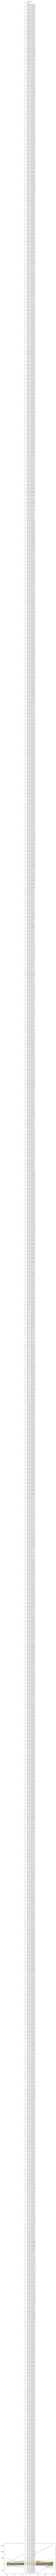

In [253]:
# chart profit over years in  line chart

import matplotlib.pyplot as plt

profit_over_years_pv.plot(kind='line', figsize=(10,6))

In [255]:
# list of products consistently in high demand across all years, started

in_demand_yearly = store_records[['product_id','quantity','category','sub_category','order_year']].groupby(['product_id','order_year']).agg({'quantity':'sum'}).reset_index()
in_demand_yearly = pd.pivot(in_demand_yearly, index='product_id', columns='order_year', values='quantity').reset_index()
in_demand_yearly = in_demand_yearly.fillna(0)
in_demand_yearly = in_demand_yearly.sort_values(by='2017', ascending=False)
in_demand_yearly

order_year       product_id  2014  2015  2016  2017
1507        TEC-AC-10001772   7.0   0.0   4.0  34.0
137         FUR-FU-10000023   3.0   3.0   8.0  31.0
327         FUR-TA-10001520   2.0   7.0   0.0  30.0
1168        OFF-PA-10002377   2.0  12.0   8.0  30.0
1583        TEC-AC-10004510   6.0   7.0   8.0  29.0
...                     ...   ...   ...   ...   ...
1625        TEC-MA-10000864   0.0  16.0   0.0   0.0
739         OFF-BI-10002437   0.0   4.0   5.0   0.0
1623        TEC-MA-10000752   0.0   0.0   8.0   0.0
1622        TEC-MA-10000597   0.0   5.0   0.0   0.0
384         OFF-AP-10000326   0.0   0.0   5.0   0.0

[1862 rows x 5 columns]